In [43]:
#!pip install imblearn
import warnings
warnings.filterwarnings('ignore')

In [44]:
import pandas as pd
from pandas.io.json import json_normalize
from pymongo import MongoClient
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats  
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import json
from bson.json_util import dumps
import urllib.parse

In [45]:
MONGODB_HOST = pd.read_csv('./database/auth')['host'][0]
username = urllib.parse.quote_plus(pd.read_csv('./database/auth')['username'][0])
password = urllib.parse.quote_plus(pd.read_csv('./database/auth')['password'][0])
conn = MongoClient('mongodb://%s:%s@%s' % (username, password, MONGODB_HOST))

conn.database_names()

['1071_Common_English',
 'AU',
 'CYCU_1031SP',
 'CYCU_1032OS',
 'CYCU_1041SP',
 'CYCU_1042OS',
 'CYCU_1051SP',
 'CYCU_1052OS',
 'KU',
 'KU_dataset_1',
 'KU_dataset_2',
 'KyoU',
 'NCU_1071MATH',
 'NCU_CHKA',
 'NCU_CHKB',
 'NCU_CL',
 'NCU_ETS',
 'NCU_FC',
 'NCUx107_Pre_college_calculas',
 'OULAD',
 'Warn',
 'admin',
 'config',
 'local']

# NCUx

### NCUx - Freshman calculas

In [4]:
db = conn['NCU_ETS']
collection = db['ets_final_score']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,_id,final_score,username
0,5bcf3bab4c5abe7ed0740962,24.5,104602004
1,5bcf3bab4c5abe7ed0740963,47.15,103602527
2,5bcf3bab4c5abe7ed0740964,74.12,104602005


In [5]:
score_df = df['final_score']
score_df = score_df.dropna()
score_df = score_df.astype(float)
ncux_fc = score_df.astype(int)

### NCUx - chka

In [6]:
db = conn['NCU_CHKA']
collection = db['chka_final_score']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,_id,final_score,username
0,5bcf3ba94c5abe7ed073fc35,20,Y1050166
1,5bcf3ba94c5abe7ed073fc36,30,Y1050167
2,5bcf3ba94c5abe7ed073fc37,10,Y1050168


In [7]:
score_df = df['final_score']
score_df = score_df.dropna()
score_df = score_df.astype(float)
ncux_chka = score_df.astype(int)

### NCUx - chkb

In [8]:
db = conn['NCU_CHKB']
collection = db['chkb_final_score']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,_id,final_score,username
0,5bcf3baa4c5abe7ed0740358,10,Y1050281
1,5bcf3baa4c5abe7ed0740359,10,Y1050280
2,5bcf3baa4c5abe7ed074035a,10,Y1050282


In [9]:
score_df = df['final_score']
score_df = score_df.dropna()
score_df = score_df.astype(float)
ncux_chkb = score_df.astype(int)

### NCUx107_Pre_college_calculas

In [10]:
def flatten(row):
    for grade in row['grades']:
        row[grade['name']] = grade['score']
    return row


In [11]:
db = conn['NCUx107_Pre_college_calculas']
collection = db['students_grades']

#collection_str = dumps(collection.find())
#collection_str = ''.join(collection_list)
#data = json.loads(collection_str)
#df = pd.read_json(data)
#json_normalize(data)
df = pd.DataFrame(list(collection.find()))
#df = df['grades'].to_frame()
#collection_list
df = df.apply(flatten, axis=1)
df = df.drop('grades', axis=1)


In [12]:
score_df = df['期末考']
score_df = score_df.dropna()
score_df = score_df.astype(float)
ncux_pre = score_df.astype(int)

### NCU_1071CL

In [13]:
db = conn['NCU_CL']
#db = conn[datasets]
db.collection_names()

['NCU_107_1_CL_control_grade', 'NCU_107_1_w1-9_CL']

In [14]:
collection = db['NCU_107_1_CL_control_grade']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,Userid,_id,log_score,midterm_score,name,pre_score,re_score
0,brstudent06,5bf3cd398b71f0dab56e8051,77,75,李鴻怡,5.0,5.0
1,brstudent11,5bf3cd398b71f0dab56e8052,88,86,劉晏誠,8.2,8.1
2,brstudent12,5bf3cd398b71f0dab56e8053,80,95,郭哲煜,6.8,6.0


In [15]:
score_df = df['midterm_score']
score_df = score_df.dropna()
score_df = score_df.astype(float)

#score_df = (score_df - score_df.mean()) / (100 - 10)

ncux_cl = score_df.astype(int)

#ncux_cl = (ncux_cl - ncux_cl.min()) / (ncux_cl.max() - ncux_cl.min())
up_bound = 100
low_bound = 25
ncux_cl = low_bound + (ncux_cl-ncux_cl.min())*(up_bound-low_bound)/(ncux_cl.max()-ncux_cl.min())

ncux_cl

0      39.423077
1      71.153846
2      97.115385
3      36.538462
4      27.884615
5      25.000000
6      85.576923
7     100.000000
8      79.807692
9      82.692308
10     45.192308
11     42.307692
12     85.576923
13     48.076923
14     62.500000
15     45.192308
16    100.000000
17     42.307692
18     30.769231
19     65.384615
20     33.653846
Name: midterm_score, dtype: float64

# CYCU

### CYCU_1031SP

In [16]:
db = conn['CYCU_1031SP']
collection = db['1031bSP2']
df = pd.DataFrame(list(collection.find()))
list(df)

['MOOCs',
 '_id',
 '上課問答',
 '加分小考',
 '協作額外上機',
 '原始總分',
 '姓名',
 '學號',
 '小考一',
 '小考二',
 '最終成績',
 '有完成遊戲',
 '期中考',
 '期末考',
 '班級',
 '程式一',
 '程式三',
 '程式二',
 '線上成績',
 '線上表現']

In [17]:
score_df = df['最終成績']
score_df = score_df.dropna()
score_df = score_df.astype(float)
cycu_1031sp = score_df.astype(int)

### CYCU 1041SP

In [18]:
db = conn['CYCU_1041SP']
collection = db['1041aSP2']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,MOOCs修課及格,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,...,小考一,小考二,最終成績,期中考,期末考,程式一,程式三,程式二,線上成績,線上表現
0,None,None,None,None,None,None,None,None,None,None,...,48,50,42,35,30,74,0,0,23.469388,52.24
1,None,None,None,None,None,None,None,None,None,None,...,88,53,40,15,28,97,0,0,22.448980,70.21
2,None,None,None,None,None,None,None,None,None,None,...,56,59,40,18,25,94,0,0,31.836735,54.80


In [19]:
score_df = df['最終成績']
score_df = score_df.dropna()
score_df = score_df.astype(float)
cycu_1041sp = score_df.astype(int)

### CYCU 1051SP

In [20]:
db = conn['CYCU_1051SP']
collection = db['1051aSP2']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,_id,上機,上課問答,上課題目,原始成績,姓名,學號,小考一,小考二,最終成績,期中考,期末考,程式一,程式三,程式二,線上成績,線上表現
0,5bcf3b974c5abe7ed071b948,0,0,0.0,29.05,7362e23d8d0581fa8f58d5af91c9d7ad,10227118,40,0,30,40,18,0,0,0,35.6,60.879875
1,5bcf3b974c5abe7ed071b949,0,0,0.0,36.71,ebbf31684e5b8207d3fdebfee396d058,10127135,0,44,37,40,18,98,0,0,16.2,56.897708
2,5bcf3b974c5abe7ed071b94a,0,0,0.0,19.91,e8c545543171e9d43ad7989be62a6ea8,10220119,0,0,20,35,0,0,0,0,35.8,58.272583


In [21]:
score_df = df['最終成績']
score_df = score_df.dropna()
score_df = score_df.astype(float)
cycu_1051sp = score_df.astype(int)

### CYCU 1042OS

In [22]:
db = conn['CYCU_1042OS']
collection = db['1042aOS2']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,MOOCs修課及格,_id,上機次數,上課問答,原始總分,姓名,學號,最終成績,期中考,期末考,第一支程式,第一次小考,第三支程式,第三次小考,第二支程式,第二次小考,第四次小考,線上成績,線上表現
0,None,5bcf3b924c5abe7ed0714d98,0,0,3.45,74fc42234a431bd1b3f5f3b4a957b957,9924137,5,0,0,0,40,0,0,0,29,0,19.0,0.00
1,None,5bcf3b924c5abe7ed0714d99,2,100,51.25,2c7991b68d432a726b059ab16020a6e1,10115240,75,88,20,98,92,0,85,0,89,56,86.8,87.00
2,None,5bcf3b924c5abe7ed0714d9a,2,100,56.10,fc8e80b9b11f98190c6af391238706c1,10220127,74,60,40,98,72,0,58,89,76,36,44.6,71.76


In [23]:
score_df = df['最終成績']
score_df = score_df.dropna()
score_df = score_df.astype(float)
cycu_1042os = score_df.astype(int)

### CYCU 1052OS

In [24]:
db = conn['CYCU_1052OS']
collection = db['1052bOS2']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,_id,上課問答,原始分數,原始總分,姓名,學號,最終成績,期中考,期末考,第一支程式,第一次小考,第三支程式,第三次小考,第二支程式,第二次小考,第五次小考,第四次小考,線上作業測驗,線上表現,課堂練習
0,5bcf3b9d4c5abe7ed0724022,40,80.65,56.10,497f673346e3e7c2aeac784418744c10,10227105,81,55,45.0,88,60,46,80,70,54,60,64,91.52,65.301389,58.3
1,5bcf3b9d4c5abe7ed0724023,10,14.79,5.50,6e04e4abf4a5d39ee5667cdb67093d15,10227228,15,10,0.0,0,50,0,0,0,0,52,56,10.00,56.704167,10.0
2,5bcf3b9d4c5abe7ed0724024,0,61.26,46.05,d16f3be7c1dd6b93dd89097481a03daa,10227232,61,15,23.0,98,40,98,43,98,65,28,44,40.61,78.784201,24.5


In [25]:
score_df = df['最終成績']
score_df = score_df.dropna()
score_df = score_df.astype(float)
cycu_1052os = score_df.astype(int)

# KU

### KU BR01

In [26]:
db = conn['KU_dataset_1']
collection = db['data1_score.csv']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,_id,score,userid
0,5bcf3ba34c5abe7ed0736389,80,ds101
1,5bcf3ba34c5abe7ed073638a,80,ds102
2,5bcf3ba34c5abe7ed073638b,60,ds103


In [27]:
score_df = df['score']
score_df = score_df.dropna()
score_df = score_df.astype(float)
ku_br01 = score_df.astype(int)

### KU BR02

In [28]:
db = conn['KU_dataset_2']
collection = db['data2_score.csv']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,_id,score,userid
0,5bcf3ba64c5abe7ed073f4ac,100.0,ds201
1,5bcf3ba64c5abe7ed073f4ad,62.5,ds202
2,5bcf3ba64c5abe7ed073f4ae,87.5,ds203


In [29]:
score_df = df['score']
score_df = score_df.dropna()
score_df = score_df.astype(float)
ku_br02 = score_df.astype(int)

# AU

### AU BIO 106

In [30]:
db = conn['AU']
collection_list = db.collection_names()
collection_list

['AU_106_2_BIO_pre_post_test_grade_preview_with_bookroll.csv',
 'AU_106_2_BIO_final_score.csv',
 'Course_1_EventStream',
 'AU_106_2_SE_score.csv',
 'AU_106_2_BIO_feature_and_score.csv',
 'Course_1_LectureTime',
 'Course_2_LectureMaterial',
 'AU_106_2_BIO_pre_post_test_grade_preview_without_bookroll.csv',
 'Course_3_LectureMaterial',
 'Course_3_LectureTime',
 'Course_2_QuizScore',
 'Course_3_QuizScore',
 'AU_106_2_SE_feature_and_score.csv',
 'AU_106_2_BIO_BookRollLog.csv',
 'Course_1_LectureMaterial',
 'Course_2_LectureTime',
 'AU_106_2_SE_BookRollLog.csv',
 'Course_1_QuizScore',
 'Course_3_EventStream',
 'Course_2_EventStream']

In [31]:
db = conn['AU']
collection = db['AU_106_2_BIO_final_score.csv']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,_id,final_score,student_id
0,5bcf3b884c5abe7ed070638d,83,103042006
1,5bcf3b884c5abe7ed070638e,60,104013080
2,5bcf3b884c5abe7ed070638f,79,104013100


In [32]:
score_df = df['final_score']
score_df = score_df.dropna()
score_df = score_df.astype(float)
au_106bio = score_df.astype(int)

### AU SE 106

In [33]:
db = conn['AU']
collection = db['AU_106_2_SE_score.csv']
df = pd.DataFrame(list(collection.find()))
#df

In [34]:
score_df = df['final_exam']
score_df = score_df.dropna()
score_df = score_df.astype(float)
au_106se = score_df.astype(int)

# Visualization

In [35]:
course_list = ['ncux_fc', 'ncux_chka', 'ncux_chkb', 'ncux_pre', 'ncux_cl', 
               'cycu_1031sp', 'cycu_1041sp', 'cycu_1051sp',
               'cycu_1042os', 'cycu_1052os',
               'ku_br01', 'ku_br02']

In [36]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [37]:
xmin, xmax = 0, 100 
lnspc = np.linspace(xmin, xmax, 1000)


X = []
for i in range(0, len(course_list)):
    m, s = stats.norm.fit(globals()[course_list[i]])  
    globals()['pdf_g_' + course_list[i]] = stats.norm.pdf(lnspc, m, s) 
    #print('pdf_g_' + course_list[i])
    X.append(globals()['pdf_g_' + course_list[i]])


In [38]:

X = np.array(X)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

labels[labels == 2] = 3
labels[labels == 1] = 2
labels[labels == 0] = 1

labels

array([1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 3, 3], dtype=int32)

In [39]:
for i in range(0, len(course_list)):
    
    globals()[course_list[i] + '_kurs'] = 'kurtosis=' + str(format(kurtosis(globals()[course_list[i]]), '.2f'))
    globals()[course_list[i] + '_skew'] = 'skew=' + str(format(skew(globals()[course_list[i]]), '.2f'))
    globals()[course_list[i] + '_type'] = 'type=' + str(labels[i])
    

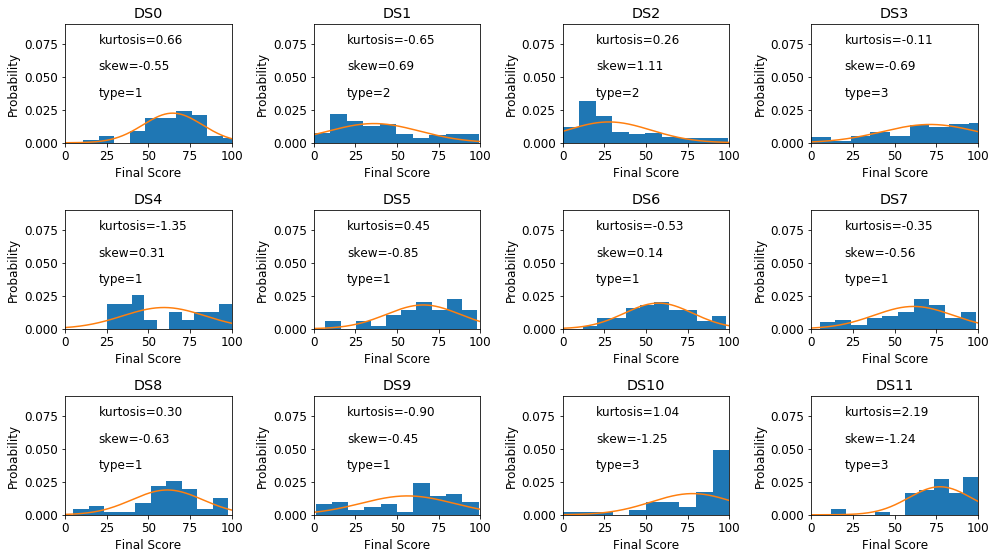

In [40]:
matplotlib.rcParams.update({'font.size': 12})

plt.figure(figsize=(14, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

label = ['Validation', 'Testing']
bins = 10
ylimit = 0.09
subplot_x = 4
subplot_y = 4

for i in range(0, len(course_list)):

    ax = plt.subplot(subplot_x, subplot_y, i+1)
    plt.hist(globals()[course_list[i]], bins = bins, density=True)
    plt.plot(lnspc, globals()['pdf_g_' + course_list[i]], label="Norm") # plot it
    plt.title('DS'+str(i))
    plt.ylabel('Probability')
    plt.xlabel('Final Score')
    plt.xlim(0, 100)
    plt.ylim(0, ylimit)
    ax.annotate(globals()[course_list[i] + '_kurs'], xy=(20, 0.075))
    ax.annotate(globals()[course_list[i] + '_skew'], xy=(20, 0.055))
    ax.annotate(globals()[course_list[i] + '_type'], xy=(20, 0.035))

plt.tight_layout()
plt.savefig('./images/score_distribution.png', dpi=300)

#plt.show()

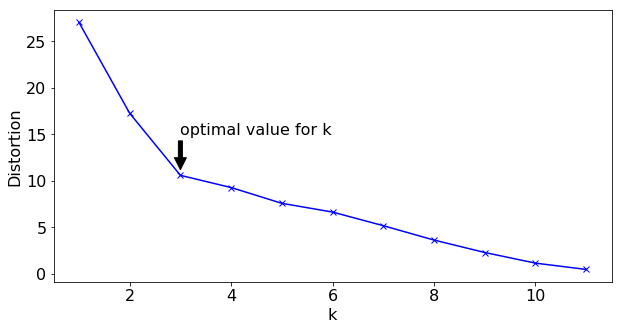

In [48]:
# k means determine k
matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(10, 5))

distortions = []
K = range(1,len(course_list))
for k in K:
    print
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'seuclidean'), axis=1)) / X.shape[0])

# metric : str or callable, optional
#     The distance metric to use.  If a string, the distance function can be
#     'braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation',
#     'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'kulsinski',
#     'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao',
#     'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean',
#     'wminkowski', 'yule'.
    
lablestring = 'optimal value for k'
plt.annotate(lablestring, xy=(3, 11), xytext=(3, 15),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
#plt.title('The Elbow Method showing the optimal k')
plt.savefig('./images/elbow.png', dpi=300)
plt.show()

In [50]:
range(1, 12)

range(1, 12)